In [1]:
import torch
import torch.nn as nn

In [2]:
max_seq_len = 8
d_model = 6

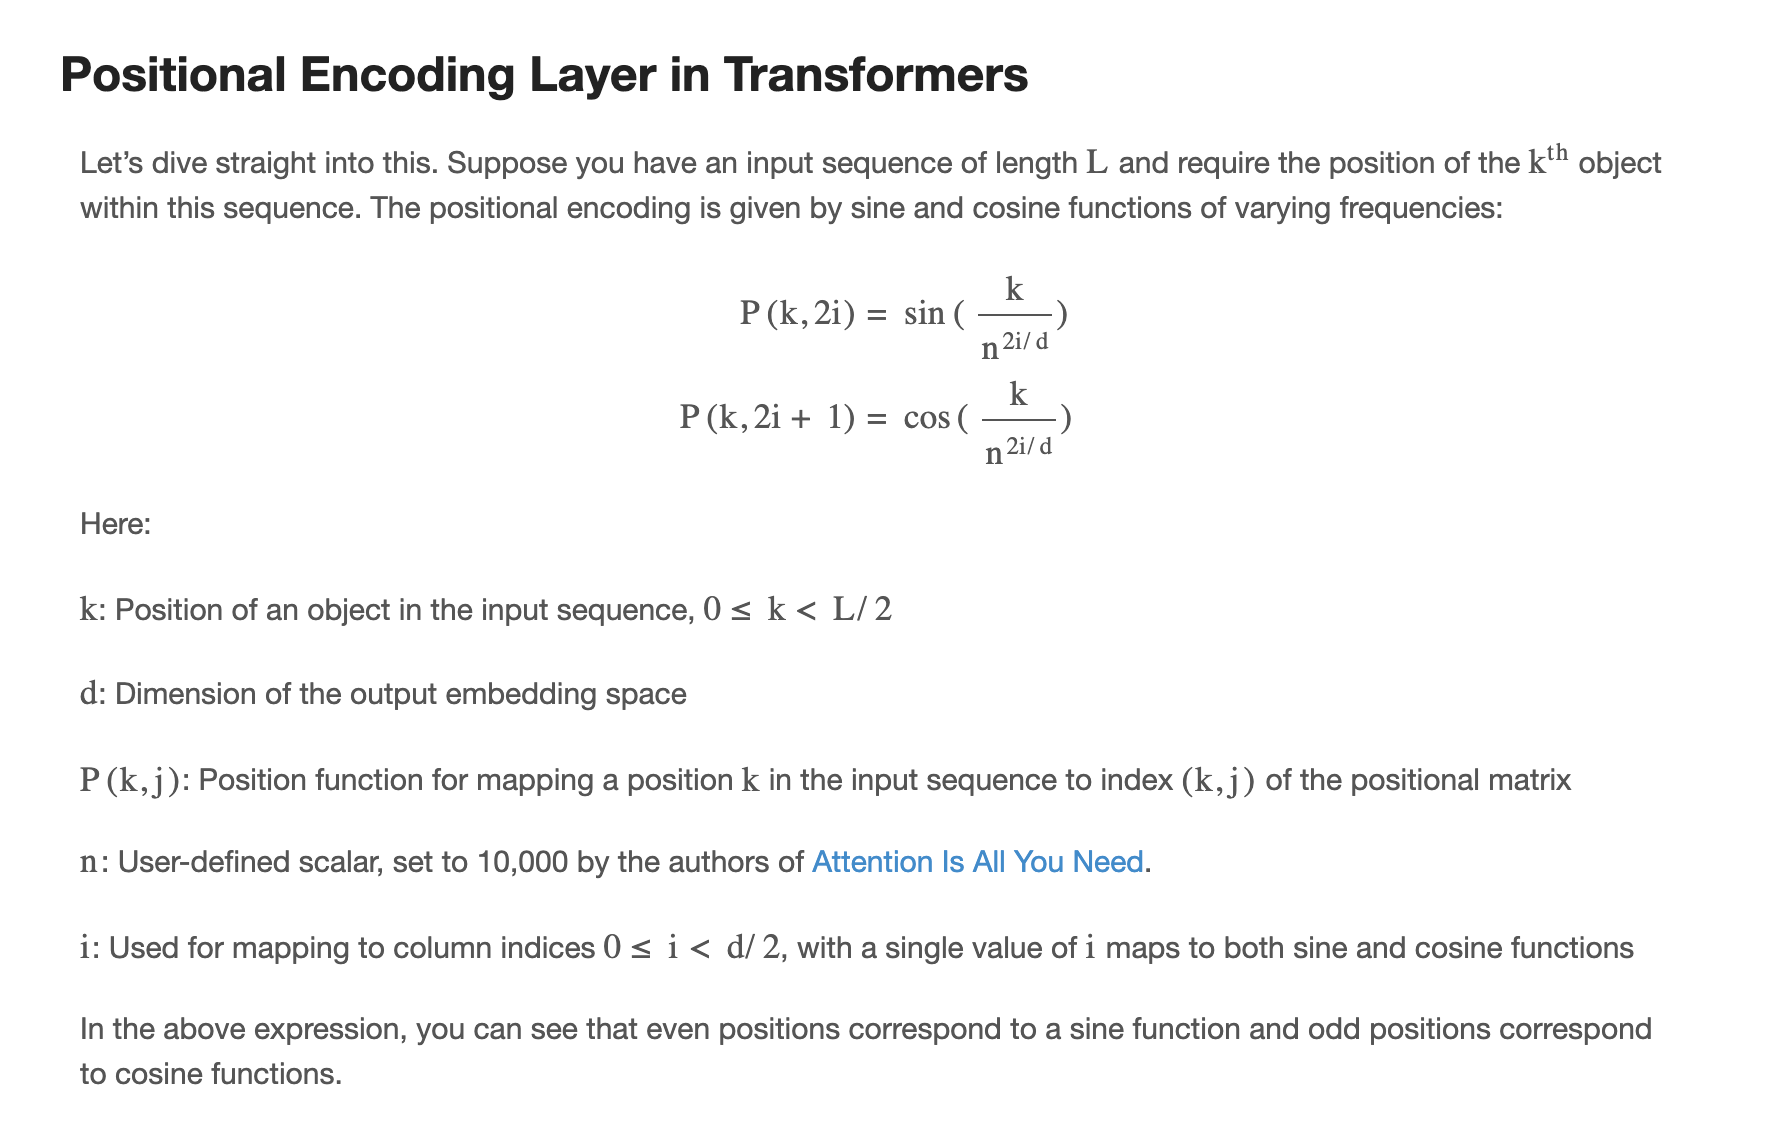

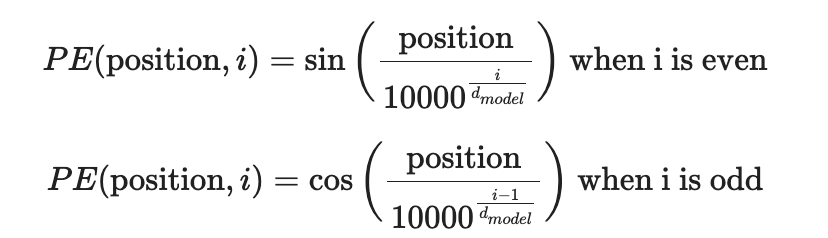

In [8]:
i_even = torch.arange(0,d_model,2).float()
i_odd = torch.arange(1,d_model,2).float()
denominator_even = torch.pow(10000,(i_even/d_model))
denominator_odd = torch.pow(10000,((i_odd - 1)/d_model))
print("denominator_even:",denominator_even, "\ndenominator_odd: ", denominator_odd) ##since both same
denominator = denominator_odd

denominator_even: tensor([  1.0000,  21.5443, 464.1590]) 
denominator_odd:  tensor([  1.0000,  21.5443, 464.1590])


In [15]:
position = torch.arange(max_seq_len,dtype=torch.float).reshape(max_seq_len,1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.]])

In [16]:
PE_even = torch.sin(position/denominator)
PE_odd = torch.cos(position/denominator)

In [17]:
PE_even

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151]])

In [18]:
PE_odd

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999]])

In [19]:
PE_even.shape

torch.Size([8, 3])

In [20]:
PE_combined = torch.stack([PE_even,PE_odd], dim=2)
PE_combined.shape

torch.Size([8, 3, 2])

In [22]:
PE = torch.flatten(PE_combined, start_dim=1, end_dim=2)
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999]])

In [26]:
class PositionalEncoding(nn.Module):
    def __init__(self, max_seq_len, d_model):
        super().__init__()
        self.max_seq_len = max_seq_len
        self.d_model = d_model
    
    def forward(self):
        i_even = torch.arange(0,d_model,2).float()
        i_odd = torch.arange(1,d_model,2).float()
        denominator_even = torch.pow(10000,(i_even/d_model))
        denominator_odd = torch.pow(10000,((i_odd - 1)/d_model))
        denominator = denominator_even
        position = torch.arange(max_seq_len,dtype=torch.float).reshape(max_seq_len,1)
        PE_even = torch.sin(position/denominator)
        PE_odd = torch.cos(position/denominator)
        PE_combined = torch.stack([PE_even,PE_odd], dim=2)
        PE = torch.flatten(PE_combined, start_dim=1, end_dim=2)
        return PE
        

In [27]:
PE = PositionalEncoding(max_seq_len=10, d_model=8)
PE.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999]])